In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
print('Esperamos trabalhar no diretório')
meu_diretorio = "C:/Users/gabri/Documents/Insper/Segundo Semestre/Ciencia dos Dados/Ciencia-dos-Dados/Projeto1"
os.chdir(meu_diretorio)

print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Documents\Insper\Segundo Semestre\Ciencia dos Dados\Ciencia-dos-Dados\Projeto1


# Projeto 1 - Ciência dos Dados#
**Gabriel Pascua de Freitas Moreira**

**Turma 2B**

**Análise da União Europeia**

Os anos a serem analisados serão no intervalo entre 2003 e 2008


A escolha desses anos foi feita por conta do ano de adesão dos quatro países analisados, sendo eles:
- Polônia
- Tchéquia
- Estônia
- Hungria

**Perguntas**
1. Países que se juntam à União Europeia tem uma diminuição da taxa de desemprego?
2. Países que se juntam União Europeia tem um aumento do PIB per capita?

**Hipóteses**
1. Países que entram na União Europeia terão uma diminuição na taxa de desemprego, visto que hanverá mais oportunidades, devida as relações com outros países europeus ser facilitada e há a possibilidade de livre transição entre países
2. Países que entram na União Europeia tem aumneto no PIB per capita, devido ao livre comércio garantido com a adesão ao bloco

**Países e suas respectivas regiões**


In [7]:

regiao = pd.read_excel('regioes.xlsx')
regiao.head()


,country,regions
0,Afghanistan,asia
1,Albania,europe
2,Algeria,africa
3,Andorra,europe
4,Angola,africa


**Pertencimento à União Europeia**

Países pertencentes à União Europeia

In [8]:
eu=["Belgium","France","Germany","Italy","Luxembourg","Netherlands","Denmark","Ireland","United Kingdom","Greece","Portugal","Spain","Austria","Finland","Sweden","Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta","Poland","Slovak Republic","Slovenia"]


In [9]:
regiao.loc[:,"EU"] = 0
regiao_idx = regiao.set_index('country')

In [10]:
regiao_idx.loc[eu,"EU"] = 1


**Porcentagem de Desempregados**


In [11]:
desemprego = pd.read_excel('desemprego.xlsx')


In [12]:
desemprego_menor = desemprego.loc[:, ["country", 2003,2004,2005,2006,2007,2008]]
desemprego_menor.head()

,country,2003,2004,2005,2006,2007,2008
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,2.49
1,Albania,NaN,NaN,NaN,NaN,16.0,13.10
2,Algeria,23.7,17.6,15.3,12.3,13.8,11.30
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN


**PIB Per Capita**

In [13]:
GDPcapita = pd.read_excel('gdpcapita.xlsx')
GDPcapita.head()


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


Junção das tabelas de Desemprego e Regiões e de PIB e regiões e índices transformados nos nomes dos países

In [14]:
desemp_idx = desemprego_menor.set_index('country')
gdp_idx = GDPcapita.set_index('country')


In [15]:
desemp_reg = desemp_idx.join(regiao_idx, how='inner')

Separação dos países europeus em relação ao seu pertencimento na União Europeia e análise quanto ao índice de desemprego

In [16]:
desemp_europe = desemp_reg[desemp_reg.regions == "europe"]

In [17]:
UE_desemp =  desemp_europe[desemp_europe.EU ==1]
UE_desemp
EU_2004 = ["Poland","Hungary","Estonia","Czech Republic"]
EU_Membros = ["Germany","France","Belgium"]


In [18]:
desemp_analise = UE_desemp.loc[["Poland","Hungary","Estonia","Czech Republic","Germany","France","Belgium"],[2003,2004,2005,2006,2007,2008]]

desemp_transpose = desemp_analise.transpose()
desemp_analise

,2003,2004,2005,2006,2007,2008
country,,,,,,
Poland,19.40,19.10,17.70,13.80,9.60,7.12
Hungary,5.79,5.83,7.19,7.49,7.41,7.82
Estonia,11.30,10.20,8.03,5.91,4.59,5.45
Czech Republic,7.54,8.21,7.93,7.15,5.32,4.39
Germany,9.78,10.70,11.20,10.30,8.66,7.52
France,8.31,8.91,8.49,8.45,7.66,7.06
Belgium,7.68,7.36,8.44,8.25,7.46,6.98


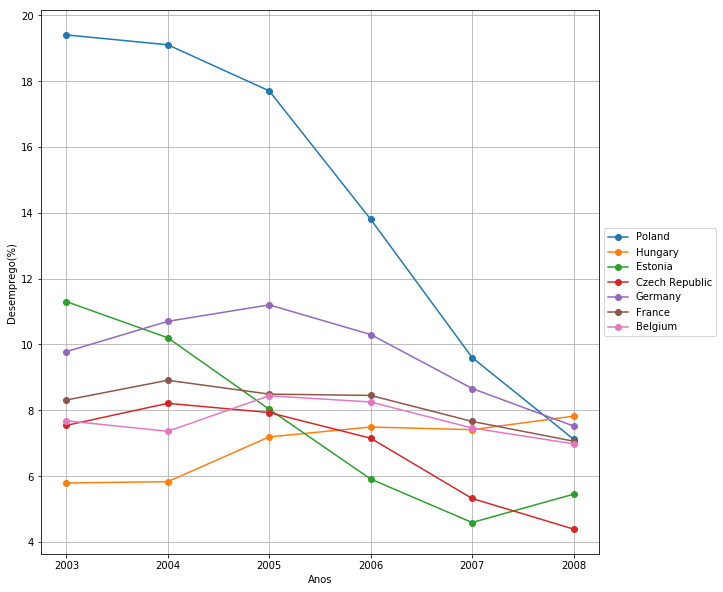

In [19]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for pais in desemp_transpose.columns:
    plt.plot(desemp_transpose.index,desemp_transpose[pais],"-o")
    plt.xlabel("Anos")
    plt.ylabel("Desemprego(%)")
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)


In [20]:

desemp_analise.loc[:,"Taxa de Desemprego"] = "Aumentou"
for pais in desemp_analise.index:
    
    if desemp_analise.loc[pais,2003]>desemp_analise.loc[pais,2008]:

        desemp_analise.loc[pais,"Taxa de Desemprego"] = "Diminuiu"
desemp_analise
#Hungria País Turístico

,2003,2004,2005,2006,2007,2008,Taxa de Desemprego
country,,,,,,,
Poland,19.40,19.10,17.70,13.80,9.60,7.12,Diminuiu
Hungary,5.79,5.83,7.19,7.49,7.41,7.82,Aumentou
Estonia,11.30,10.20,8.03,5.91,4.59,5.45,Diminuiu
Czech Republic,7.54,8.21,7.93,7.15,5.32,4.39,Diminuiu
Germany,9.78,10.70,11.20,10.30,8.66,7.52,Diminuiu
France,8.31,8.91,8.49,8.45,7.66,7.06,Diminuiu
Belgium,7.68,7.36,8.44,8.25,7.46,6.98,Diminuiu


# Análise dos dados
**Taxa de desemprego**

Analisando o gráfico plotado acima e a coluna criada a partir da comparação entre as taxas de desemprego do primeiro e do último ano analisados, é possível perceber que após a entrada na União Europeia, a tendecência é da taxa de desemprego diminuir, isso pode ser obseravdo tanto para os membros que já estavam presentes na organização quanto para os que acabaram de se juntar a ela.

Porém a Hungria, se comportou como uma exceção, foi o único dos países analisados que teve aumento na taxa de desemprego, e um dos possíveis motivos disso é que a Hungria passou por uma transição do sistema comunista para um sistema democrático e capitalista, por conta disso e da rápida privatização e fim dos subsídios estatais, o país apresentava um quadro de recessão economica e portanto em suas eleições havia sempre a mudança de partido político, assim gerando uma instabilidade na sua economia e aumentando as taxas de desemprego, esse quadro já não está mais presente nos dias de hoje e portanto após 2010 a sua taxa de desmeprego começou a dimunuir com era esperado.

In [21]:
NOT_UE_desemp =  desemp_europe[desemp_europe.EU ==0]
NOT_UE_desemp

,2003,2004,2005,2006,2007,2008,regions,EU
country,,,,,,,,
Albania,NaN,NaN,NaN,NaN,16.00,13.10,europe,0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,europe,0
Azerbaijan,9.25,8.00,7.30,6.62,6.54,6.05,europe,0
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,europe,0
Bosnia and Herzegovina,NaN,NaN,NaN,31.10,29.00,23.40,europe,0
Bulgaria,13.70,12.00,10.10,8.95,6.88,5.61,europe,0
Croatia,13.90,13.70,12.60,11.10,9.91,8.53,europe,0
Georgia,NaN,NaN,NaN,NaN,NaN,NaN,europe,0
Iceland,4.00,4.03,2.55,2.83,2.25,2.95,europe,0


**Separação dos países europeus em relação ao seu pertencimento na União Europeia e análise quanto ao PIB**

In [22]:
gdp_reg = gdp_idx.join(regiao_idx, how='inner')

gdp_reg_f = gdp_reg.loc[:,[2003,2004,2005,2006,2007,2008,'regions','EU']]

gdp_europe = gdp_reg_f[gdp_reg_f.regions == "europe"]

In [23]:
UE_gdp =  gdp_europe[gdp_europe.EU ==1]
UE_gdp
gdp_analise = UE_gdp.loc[["Poland","Hungary","Estonia","Czech Republic","Germany","France","Belgium"],[2003,2004,2005,2006,2007,2008]]
gdp_transpose = gdp_analise.transpose()
gdp_transpose

country,Poland,Hungary,Estonia,Czech Republic,Germany,France,Belgium
2003,9140.0,11900.0,12500.0,16100.0,38200.0,39100.0,41000.0
2004,9610.0,12500.0,13300.0,16900.0,38700.0,39900.0,42300.0
2005,9950.0,13100.0,14700.0,18000.0,39000.0,40300.0,43000.0
2006,10600.0,13600.0,16300.0,19200.0,40500.0,40900.0,43800.0
2007,11300.0,13700.0,17600.0,20200.0,41800.0,41600.0,45000.0
2008,11800.0,13900.0,16700.0,20500.0,42400.0,41500.0,45000.0


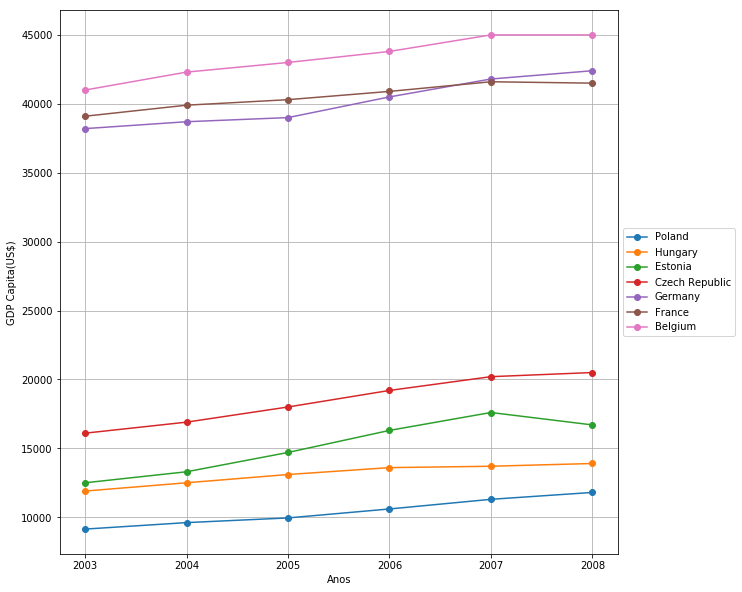

In [24]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for pais in gdp_transpose.columns:
    plt.plot(gdp_transpose.index,gdp_transpose[pais],"-o")
    plt.xlabel("Anos")
    plt.ylabel("GDP Capita(US$)")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

In [25]:
gdp_analise.loc[:,"PIB per Capita"] = "Aumentou"
for pais in gdp_analise.index:
    
    if gdp_analise.loc[pais,2003]>gdp_analise.loc[pais,2008]:

        gdp_analise.loc[pais,"PIB per Capita"] = "Diminuiu"
gdp_analise

,2003,2004,2005,2006,2007,2008,PIB per Capita
country,,,,,,,
Poland,9140.0,9610.0,9950.0,10600.0,11300.0,11800.0,Aumentou
Hungary,11900.0,12500.0,13100.0,13600.0,13700.0,13900.0,Aumentou
Estonia,12500.0,13300.0,14700.0,16300.0,17600.0,16700.0,Aumentou
Czech Republic,16100.0,16900.0,18000.0,19200.0,20200.0,20500.0,Aumentou
Germany,38200.0,38700.0,39000.0,40500.0,41800.0,42400.0,Aumentou
France,39100.0,39900.0,40300.0,40900.0,41600.0,41500.0,Aumentou
Belgium,41000.0,42300.0,43000.0,43800.0,45000.0,45000.0,Aumentou


In [26]:
NOT_UE_gdp =  gdp_europe[gdp_europe.EU ==0]
NOT_UE_gdp

,2003,2004,2005,2006,2007,2008,regions,EU
country,,,,,,,,
Albania,2830.0,3000.0,3190.0,3380.0,3610.0,3780.0,europe,0
Andorra,45500.0,47000.0,48800.0,49700.0,48700.0,43900.0,europe,0
Armenia,2020.0,2240.0,2570.0,2930.0,3370.0,3630.0,europe,0
Azerbaijan,2160.0,2360.0,2950.0,3920.0,4850.0,5260.0,europe,0
Belarus,3370.0,3780.0,4160.0,4610.0,5030.0,5560.0,europe,0
Bosnia and Herzegovina,3420.0,3630.0,3950.0,4160.0,4410.0,4660.0,europe,0
Bulgaria,4800.0,5150.0,5560.0,5990.0,6480.0,6910.0,europe,0
Croatia,12100.0,12600.0,13100.0,13800.0,14500.0,14800.0,europe,0
Georgia,1810.0,1940.0,2160.0,2390.0,2720.0,2820.0,europe,0


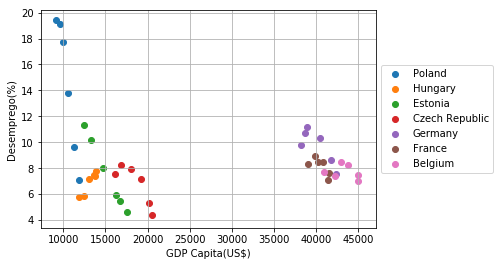

In [27]:
ax = plt.subplot(111)
for pais in gdp_transpose.columns:
    plt.scatter(x= gdp_transpose[pais],y=desemp_transpose[pais])
    plt.ylabel("Desemprego(%)")
    plt.xlabel("GDP Capita(US$)")
    plt.grid(True)
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
